In [1]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.applications.vgg16 import VGG16
import matplotlib.pyplot as plt
from glob import glob

In [2]:
import warnings
warnings.filterwarnings('ignore') 

In [3]:
from tensorflow.keras.datasets import cifar10

In [4]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [5]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


In [7]:
import numpy as  np

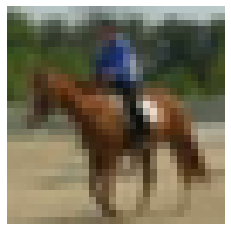

In [8]:
plt.imshow(x_train[551].astype(np.uint8))
plt.axis("off")
plt.show()

In [9]:
numberOfClass = 10

In [10]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, numberOfClass)
y_test = to_categorical(y_test, numberOfClass)

In [11]:
input_shape = x_train.shape[1:]

In [12]:
input_shape

(32, 32, 3)

In [13]:
import cv2

In [14]:
#increase dimension
def resize_img(img):
    numberOfImage = img.shape[0] #img.shape[0] -> 50000 sample için boyut genişletme uygulanır.
    new_array = np.zeros((numberOfImage, 48,48,3)) 
    for i in range(numberOfImage):
        new_array[i] = cv2.resize(img[i,:,:,:],(48,48))
    return new_array

In [16]:
x_train = resize_img(x_train)
x_test = resize_img(x_test)
print("increased dim x_train: ",x_train.shape)

increased dim x_train:  (50000, 48, 48, 3)


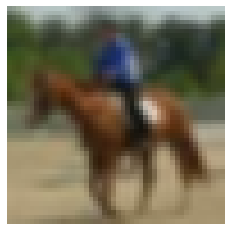

In [17]:
plt.figure()
plt.imshow(x_train[551].astype(np.uint8))
plt.axis("off")
plt.show()

In [18]:
from keras.applications.vgg19 import VGG19

In [19]:
vgg = VGG19(include_top = False, weights = "imagenet", input_shape = (48,48,3))

In [20]:
print(vgg.summary())
print(type(vgg))

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0     

In [21]:
vgg_layer_list = vgg.layers
print(vgg_layer_list)

[<keras.engine.input_layer.InputLayer object at 0x0000019C543E0190>, <keras.layers.convolutional.conv2d.Conv2D object at 0x0000019C46CF9CA0>, <keras.layers.convolutional.conv2d.Conv2D object at 0x0000019C543CE850>, <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x0000019C46CF9E50>, <keras.layers.convolutional.conv2d.Conv2D object at 0x0000019C46E25370>, <keras.layers.convolutional.conv2d.Conv2D object at 0x0000019C46E14280>, <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x0000019C51E9FEB0>, <keras.layers.convolutional.conv2d.Conv2D object at 0x0000019C46F8E0A0>, <keras.layers.convolutional.conv2d.Conv2D object at 0x0000019C46F874F0>, <keras.layers.convolutional.conv2d.Conv2D object at 0x0000019C46E258E0>, <keras.layers.convolutional.conv2d.Conv2D object at 0x0000019C46F9D670>, <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x0000019C46E2F970>, <keras.layers.convolutional.conv2d.Conv2D object at 0x0000019C46FAA2E0>, <keras.layers.convolutional.conv2d

In [22]:
model = Sequential()
for i in range(len(vgg_layer_list)-1):
    model.add(vgg_layer_list[i])

In [23]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 12, 12, 256)       2

In [24]:
for layers in model.layers:
    layers.trainable = False

In [25]:
#fully connected layer
model.add(Flatten())
model.add(Dense(128))
model.add(Dense(numberOfClass, activation= "softmax"))

In [26]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 12, 12, 256)       2

In [27]:
model.compile(loss = "categorical_crossentropy",
              optimizer = "rmsprop",
              metrics = ["accuracy"])

In [28]:
hist = model.fit(x_train, y_train, validation_split = 0.2, epochs = 5, batch_size = 1500)

Epoch 1/5
27/27 [==============================] - 228s 8s/step - loss: 22.1125 - accuracy: 0.4517 - val_loss: 13.2503 - val_accuracy: 0.5109
Epoch 2/5
27/27 [==============================] - 248s 9s/step - loss: 13.3930 - accuracy: 0.5374 - val_loss: 8.7944 - val_accuracy: 0.5613
Epoch 3/5
27/27 [==============================] - 259s 10s/step - loss: 10.9426 - accuracy: 0.5589 - val_loss: 6.9145 - val_accuracy: 0.5912
Epoch 4/5
27/27 [==============================] - 262s 10s/step - loss: 9.3180 - accuracy: 0.5786 - val_loss: 9.3266 - val_accuracy: 0.5461
Epoch 5/5
27/27 [==============================] - 268s 10s/step - loss: 8.5679 - accuracy: 0.5886 - val_loss: 10.6791 - val_accuracy: 0.5559


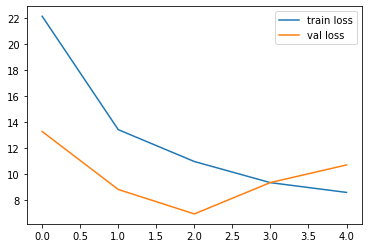

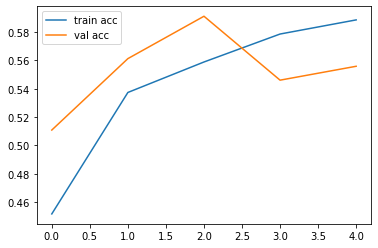

In [29]:
plt.plot(hist.history["loss"], label = "train loss")
plt.plot(hist.history["val_loss"], label = "val loss")
plt.legend()
plt.show()
plt.figure()
plt.plot(hist.history["accuracy"], label = "train acc")
plt.plot(hist.history["val_accuracy"], label = "val acc")
plt.legend()
plt.show()

In [30]:
#model save
model.save_weights("transfer_learning_vgg19_cfar10.h5")

In [31]:
print(hist.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


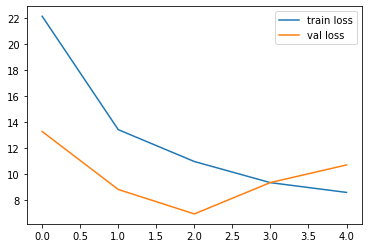

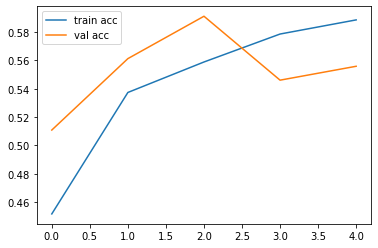

In [32]:
plt.plot(hist.history["loss"], label = "train loss")
plt.plot(hist.history["val_loss"], label = "val loss")
plt.legend()
plt.show()
plt.figure()
plt.plot(hist.history["accuracy"], label = "train acc")
plt.plot(hist.history["val_accuracy"], label = "val acc")
plt.legend()
plt.show()

In [33]:
#save history
import json, codecs
with open("transfer_learning_vgg19_cfar10.json","w") as f:
    json.dump(hist.history,f)

In [34]:
#load
import json, codecs
with codecs.open("transfer_learning_vgg19_cfar10.json","r",encoding = "utf-8") as f:
    n = json.loads(f.read())

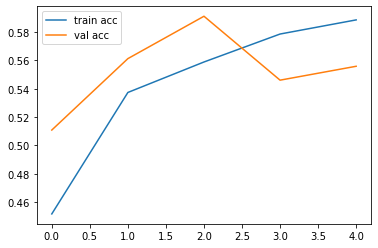

In [35]:
plt.plot(n["accuracy"], label = "train acc")
plt.plot(n["val_accuracy"], label = "val acc")
plt.legend()
plt.show()